<a href="https://colab.research.google.com/github/pranay8297/deep-learning-projects/blob/master/EAI6010_PranayBindela_Colab_Week1_2_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bitcoin Price History**

This tutorial, inspired by https://notebooks.ai/notebooks-ai/sample-project-tutorial-742bde1f,  we're going to pull LiteCoin cryptocurrency prices from a public API and download them as Excel files. I need to import two libraries first: *requests*  (to pull data from the web) and *pandas* to process it. May require `pip install requests`

In [1]:
import requests
import pandas as pd

I have a predefined function that simplifies the process of importing data from Cryptowatch (for reference, check their docs).

In [10]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })

    resp.raise_for_status()
    data = resp.json()

    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

I will now pull data from LiteCoin, the most popular cryptocurrencies, for the last 100 days:

In [11]:
last_100days = (pd.Timestamp.now() - pd.offsets.Day(100))
last_100days

Timestamp('2022-01-06 08:19:31.328053')

In [12]:
ltc = get_historic_price('ltc', 'bitstamp', after=last_100days)
ltc.tail()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-04-16 05:00:00,111.93,112.04,111.85,111.85,337.584451,37806.801206
2022-04-16 06:00:00,111.76,111.90,111.56,111.90,415.750273,46483.647022
2022-04-16 07:00:00,111.82,111.82,111.57,111.71,399.897380,44674.920697
2022-04-16 08:00:00,111.76,111.77,111.59,111.72,58.072236,6486.681316
2022-04-16 09:00:00,111.49,111.72,111.30,111.72,139.556844,15570.075748


Let's plot it:

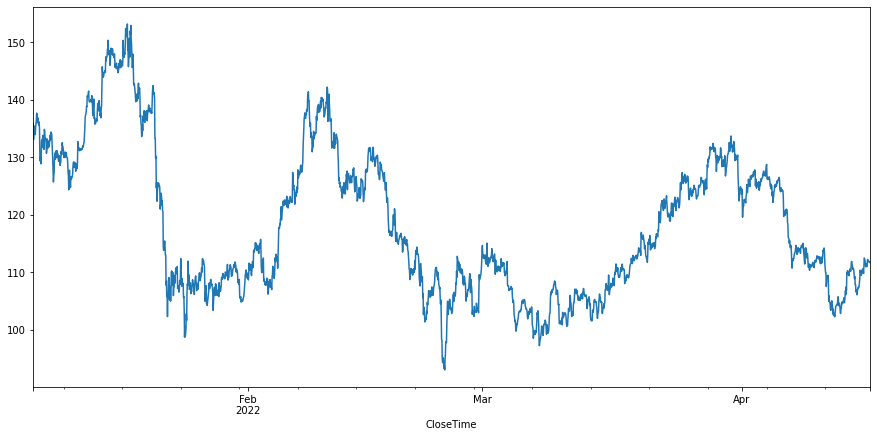

In [13]:
ltc['ClosePrice'].plot(figsize=(15, 7))

**Dynamic plots with Bokeh**

May need to `pip install bokeh`

In [14]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
output_notebook()

p1 = figure(x_axis_type="datetime", title="Crypto Prices")
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price $'
p1.line(ltc.index, ltc['ClosePrice'], color='#f2a900', legend_label='Bitcoin')
p1.legend.location = "top_left"

show(p1)

**Exporting to Excel**

In [7]:
writer = pd.ExcelWriter('Bitcoin_history.xlsx')
ltc.to_excel(writer, sheet_name='Bitcoin')
writer.save()